# Regularization for linear regressor models

In [153]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import load_boston, load_iris, load_wine, load_digits, \
                             load_breast_cancer, load_diabetes, fetch_mldata
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

import matplotlib.pyplot as plt

def score(X, y, model, n=10):
    train_scores = []
    test_scores = []
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model.fit(X_train, y_train)
        train_score = model.score(X_train, y_train)
        train_scores.append(train_score)
        test_score = model.score(X_test, y_test)
        test_scores.append(test_score)
    return np.mean(train_scores), np.mean(test_scores)

## Synthetic data set

Let's start with a simple linear regression model of $y$ on $x$ for synthetic data set, just to get a baseline.   Since this is a toy example, we won't bother with separating a test set out.  Even the training error is going to fall apart for this example.

In [154]:
n = 10
df = pd.DataFrame()
df['x'] = np.linspace(0,10,num=n)
df['y'] = df['x'] + np.random.normal(0,1,size=n)
df

,x,y
0,0.000000,-2.133444
1,1.111111,1.394729
2,2.222222,3.174743
3,3.333333,3.299339
4,4.444444,6.003524
5,5.555556,6.875770
6,6.666667,6.913300
7,7.777778,7.086801
8,8.888889,9.751050
9,10.000000,10.341040


In [155]:
X, y = df.drop('y',axis=1), df['y']
lm = LinearRegression()
lm.fit(X, y)
beta0 = lm.intercept_
beta1 = lm.coef_[0]
lm.score(X, y) # bounces around depending on test set

0.9299399838161625

The model produces a nice regression line through the data points as we would expect.

Text(0.5, 1.0, '$\\beta_1$ = 1.102, $\\beta_0$ = -0.24')

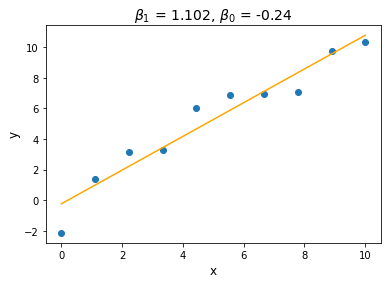

In [156]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['x']*lm.coef_[0] + lm.intercept_, c='orange')
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title(f"$\\beta_1$ = {beta1:.3f}, $\\beta_0$ = {lm.intercept_:.2f}", fontsize=14)

Let's add an outlier, making the last y value 100

In [157]:
y.iloc[-1] = 100
y

0     -2.133444
1      1.394729
2      3.174743
3      3.299339
4      6.003524
5      6.875770
6      6.913300
7      7.086801
8      9.751050
9    100.000000
Name: y, dtype: float64

In [158]:
X, y = df.drop('y',axis=1), df['y']
lm = LinearRegression()
lm.fit(X, y)
beta0 = lm.intercept_
beta1 = lm.coef_[0]
lm.score(X, y) # bounces around depending on test set

0.3727050562211609

Text(0.5, 1.0, '$\\beta_1$ = 5.503, $\\beta_0$ = -13.28')

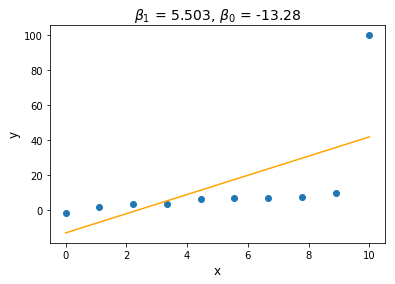

In [159]:
plt.scatter(X, y)
plt.plot(X, X*beta1 + lm.intercept_, c='orange')
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title(f"$\\beta_1$ = {beta1:.3f}, $\\beta_0$ = {lm.intercept_:.2f}", fontsize=14)

The $\beta_1$ coefficient jumps from .99 to 5.35 and the Y intercept goes from 0.54 to -12.39. These are radically different coefficients that arise simply because one value is an outlier.

R^2 score 0.13250168282259145


Text(0.5, 1.0, '$\\beta_1$ = 1.085, $\\beta_0$ = 8.81')

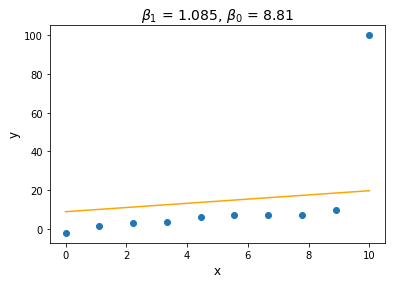

In [160]:
X, y = df.drop('y',axis=1), df['y']
y.iloc[-1] = 100
lm = Lasso(alpha=45)
lm.fit(X, y)
beta0 = lm.intercept_
beta1 = lm.coef_[0]
print("R^2 score", lm.score(X, y))

plt.scatter(X, y)
plt.plot(X, X*beta1 + lm.intercept_, c='orange')
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title(f"$\\beta_1$ = {beta1:.3f}, $\\beta_0$ = {lm.intercept_:.2f}", fontsize=14)

The 0.11 score is not that great but we have sacrificed a bit of accuracy for a much more reasonable coefficient. The $\beta_1$ is now 0.93, very close to the 0.99 we get without the outlier.  If we could reduce the $y$-intercept, $\beta_0$, we get a much better score.

What went wrong with the $y$-intercept? We did not normalize our variables. We have to convert them to standard scores so they are all in the same range and zero centered. If the  variables are all in different ranges, regularization will squash some coefficients more than the others because all regularization does is constrain coefficients. If the variables are not zero centered, then regularization will leave the intercept in a shifted location.

## Normalization

In [161]:
def normalize(X): # well, I'm creating standard variables here (u-x)/sigma
    for colname in X.columns:
        u = np.mean(X[colname])
        s = np.std(X[colname])
        X[colname] = (X[colname] - u) / s

In [162]:
X, y = df.drop('y',axis=1), df['y']
y.iloc[-1] = 100
normalize(X)
X

,x
0,-1.566699
1,-1.218544
2,-0.870388
3,-0.522233
4,-0.174078
5,0.174078
6,0.522233
7,0.870388
8,1.218544
9,1.566699


In [163]:
y

0     -2.133444
1      1.394729
2      3.174743
3      3.299339
4      6.003524
5      6.875770
6      6.913300
7      7.086801
8      9.751050
9    100.000000
Name: y, dtype: float64

R^2 score 0.10086996286887062


Text(0.5, 1.0, '$\\beta_1$ = 2.564, $\\beta_0$ = 14.24')

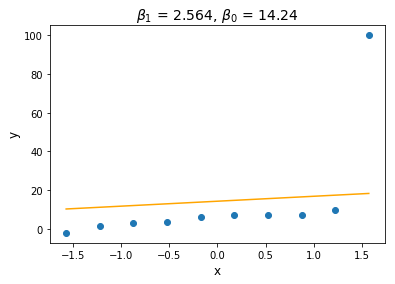

In [197]:
lm = Lasso(alpha=15)
#lm = Ridge(alpha=13)
lm.fit(X, y)
beta0 = lm.intercept_
beta1 = lm.coef_[0]
print("R^2 score", lm.score(X, y))

plt.scatter(X, y)
plt.plot(X, X*beta1 + lm.intercept_, c='orange')
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.title(f"$\\beta_1$ = {beta1:.3f}, $\\beta_0$ = {lm.intercept_:.2f}", fontsize=14)

## Ames housing data set

Log into Kaggle and get [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). A useful discussion on this data set is [here](https://nycdatascience.com/blog/student-works/machine-learning-project/).